In [1]:
import numpy as np
import pandas as pd
import pickle
import gensim, logging
from gensim.models.word2vec import Word2Vec # the word2vec model gensim class
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [22]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matpl otlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))
    
def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        #print(v)
        plotMat.append(v)

    #print('plotMat: {0}'.format(plotMat))
    #print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


# Load Document

In [3]:
with open('Documents.pickle', 'rb') as f:
     Documents = pickle.load(f)

In [4]:
print(Documents[1])

(['This', 'cd', 'storage', 'unit', 'isnt', 'greatest', 'cd', 'rack', 'want', 'something', 'job', 'isnt', 'costly', 'thing', 'made', 'plasti'], 'neg')


In [5]:
len(Documents)

38252

# Load model Word2Vec

In [6]:
model = Word2Vec.load('model.bin')

In [7]:
words = list(model.wv.vocab)
print(words[:100])
print(len(words))

['loooooove', 'unravelling', 'va', 'ranked', 'Hank', 'financial', 'learnt', 'Ginsberg', 'conditioning', 'Ormandy', 'transducer', 'Fluke', 'abode', 'Pendergast', 'unburgerlike', 'hylexin', 'Louris', 'First', 'BIOSAFE', 'HR', 'transferred', 'Brilliance', 'Gorton', 'miso', 'Take', 'variet', 'seagate', 'Gut', 'impressively', 'nodding', 'Kaspersky', 'aboslutely', 'critisize', 'See', 'STRAITS', 'Spyder', 'omission', 'Monte', 'catchiest', 'battery', 'G7', 'obituary', 'Holding', 'prominent', 'rancid', 'Sidekick', 'Promote', 'offputting', 'Schacter', 'orchestra', 'infustion', 'flyin', 'OVERLY', 'CS70', 'discontinued', 'licking', 'cupboard', 'puerile', 'Nonce', 'Lillard', 'slogan', 'RC60i', 'Vengeance', 'oprah', 'agreeed', 'constructing', 'Bisset', 'Girard', 'HDV', 'EXTREAMLY', 'verbena', 'Ryan', 'TerrorKing', 'diffusing', 'recomiendo', 'mocked', 'fiesty', 'XCR', 'Dentist', 'Adjani', 'unneccesary', 'Tosca', 'Prodigal', 'quoted', 'Itch', 'showy', 'gestalt', 'June', 'disablity', 'overcoming', 'PVR

In [8]:
print(model['good'])

[-1.7942369  -0.33382452  0.53393573 -1.49024665  2.13324285 -1.07749557
 -0.21262288  0.34546664  0.18661968  0.5688681  -0.42535612 -1.46868777
  0.93791354 -2.37185121 -0.70141095 -0.97950858 -0.20312025 -1.05897725
  0.24206859 -1.13369942  1.64162016 -0.62616527  0.84927803 -0.47696629
  0.9985494   2.15098667 -1.19898152 -0.41598585 -0.09528159 -0.71344221
  1.71227407  0.55450243  1.27753496  1.19460034  0.40057173  0.09237026
  0.4424268   1.08676672  0.90509695 -0.19481269  0.91103834  1.15113425
 -0.06785039 -1.40121436 -1.46531594  2.50178266 -0.34803048  0.43969256
 -0.88642263  0.0435985   0.38556442 -0.51324308  0.47357002  0.97148091
 -1.61388481  1.60577309 -1.04554963 -0.12987329 -0.04974201  1.37973344
 -0.5297085  -1.21039498 -0.49806824  2.03258801  1.18041825 -0.10756348
 -0.62049466  0.31814304  0.93198586 -0.41446197 -0.50262237  0.63203847
  0.2493732   1.07827461  0.12296637 -0.33538577 -0.52173108 -1.23262429
 -0.45114192 -1.53980911 -0.46345225  2.11707377  0

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [9]:
len(words)

61782

## First approche : Word Average embedding model
-  a naive approche is to take the average of all words vectors from sentence to get a single 100 dimension vector that represent the sentiment of a hole sentence we feed it to the model and try to get some fast results

In [10]:
def Sent_Embeding(words,Documents):
    X_SentsEmb = []
    y_SentsEmb = []
    #on Va récuperer l'embeding de chaque sentence avec l'average des vecteur qui le compose
    for S,t in Documents: #S est la phrase , t est la class
        #Average of embeding of all words in sentence
        Sent = []
        Sent = [model[m] for m in S]
        
        #Add Sentence Vector to list
        X_SentsEmb.append(np.mean(Sent, axis=0).tolist())
        #Add label to y_SentEmb
        if t == 'neg':
            y_SentsEmb.append(0)
        elif t == 'pos':
            y_SentsEmb.append(1)
        else:
            print('No match label !!! ',t)
    return X_SentsEmb,y_SentsEmb
    
    
            

In [11]:
X,Y = Sent_Embeding(words,Documents)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


### Let's Test our sentence embeddings with the cosin similarity
- We take 2 positif sentences 

In [12]:
print("Sentence 7 : ",Documents[7])
print("Sentence 2 : ",Documents[2])
print("Sentence embedding 7 : ",X[7])
print("Sentence embedding 2 : ",X[2])

Sentence 7 :  (['Jeff', 'Beck', 'best', 'guitarist', 'planet', 'long', 'time'], 'pos')
Sentence 2 :  (['bought', 'skate', 'christmas', 'present', 'daughter', 'skated', 'around', 'house', 'morning', 'good', 'buy'], 'pos')
Sentence embedding 7 :  [0.047813210636377335, -0.30950334668159485, -0.10223495960235596, 0.3831125795841217, 0.3887883722782135, -0.41005679965019226, -0.4837762415409088, 0.25184711813926697, 0.27380043268203735, 0.28150010108947754, 0.639875054359436, 0.20240937173366547, 0.7023287415504456, -0.5865568518638611, -0.2365250289440155, -0.011564970016479492, 0.03291887417435646, 0.2969110608100891, -0.23104561865329742, -0.5682569742202759, 1.0255542993545532, -0.5468829870223999, 0.12040659040212631, -0.19912053644657135, -0.2024727165699005, 0.51146000623703, -0.032202303409576416, 0.060952942818403244, 0.12817616760730743, -0.0744028240442276, 0.44108375906944275, -0.4889131486415863, 0.19122996926307678, 0.5238741040229797, 0.4133130609989166, -0.2780018448829651,

# 1 - Cosine similarity

To measure how similar two words are, we need a way to measure the degree of similarity between two embedding vectors for the two words. Given two vectors $u$ and $v$, cosine similarity is defined as follows: 

$$\text{CosineSimilarity(u, v)} = \frac {u . v} {||u||_2 ||v||_2} = cos(\theta) \tag{1}$$

where $u.v$ is the dot product (or inner product) of two vectors, $||u||_2$ is the norm (or length) of the vector $u$, and $\theta$ is the angle between $u$ and $v$. This similarity depends on the angle between $u$ and $v$. If $u$ and $v$ are very similar, their cosine similarity will be close to 1; if they are dissimilar, the cosine similarity will take a smaller value. 

<caption><center> **Figure 1**: The cosine of the angle between two vectors is a measure of how similar they are</center></caption>

**Exercise**: Implement the function `cosine_similarity()` to evaluate similarity between word vectors.

**Reminder**: The norm of $u$ is defined as $ ||u||_2 = \sqrt{\sum_{i=1}^{n} u_i^2}$

In [13]:
# GRADED FUNCTION: cosine_similarity

def cosine_similarity(u, v):
    """
    Cosine similarity reflects the degree of similariy between u and v
        
    Arguments:
        u -- a word vector of shape (n,)          
        v -- a word vector of shape (n,)

    Returns:
        cosine_similarity -- the cosine similarity between u and v defined by the formula above.
    """
    
    distance = 0.0
    
    ### START CODE HERE ###
    # Compute the dot product between u and v (≈1 line)
    dot = np.dot(u,v)
    # Compute the L2 norm of u (≈1 line)
    norm_u = np.sqrt(sum(u**2))
    
    # Compute the L2 norm of v (≈1 line)
    norm_v = np.sqrt(sum(v**2))
    # Compute the cosine similarity defined by formula (1) (≈1 line)
    cosine_similarity = dot/(norm_u*norm_v)
    ### END CODE HERE ###
    
    return cosine_similarity

### VEry good we got 0.67 which means that this sentence are close to each other as they are positives comments

In [14]:
print("cosine_similarity = ", cosine_similarity(np.array(X[2]),np.array(X[7])))

cosine_similarity =  0.68969735523


### Let's See with different class we take this time two negatif
- this example is tricky ['This', 'cd', 'storage', 'unit', 'isnt', 'greatest', 'cd', 'rack', 'want', 'something', 'job', 'isnt', 'costly', 'thing', 'made', 'plasti'] because we see that we a naive approche the model will catch the word greatest which is a positif word so it will consider this statment as positive were the truth is this comment containt words befor and after greatest like isnt that help the model to distingush the class this probleme will be delt with when we use the ** RNN ** because it takes into account past and future words in a sequence
-  For know we focus on the similarity to see the average vectors how they handle this evalution test

In [15]:
print("Sentence 9 : ",Documents[9])
print("Sentence 1 : ",Documents[1])
print("Sentence embedding 9 : ",X[9])
print("Sentence embedding 1 : ",X[1])

Sentence 9 :  (['Bought', 'camera', 'wife', 'Takes', 'good', 'picture', 'handle', 'camera', 'extreme', 'caution', 'If', 'drop', 'prepared', 'large', 'repair', 'bill', 'Fuji', 'customer', 'relation', 'sub', 'par', 'Warranty', 'cover', 'impact', 'internal', 'damage', 'I', 'better', 'luck', 'Nikon', 'Kodak', 'steer', 'clear', 'Fuji', 'future'], 'neg')
Sentence 1 :  (['This', 'cd', 'storage', 'unit', 'isnt', 'greatest', 'cd', 'rack', 'want', 'something', 'job', 'isnt', 'costly', 'thing', 'made', 'plasti'], 'neg')
Sentence embedding 9 :  [-0.14247314631938934, -0.29889851808547974, -0.1033640205860138, -0.0217785332351923, 0.02472921460866928, 0.005216314923018217, 0.01827956922352314, 0.1828407198190689, 0.2856401801109314, -0.04774235561490059, 0.4215581715106964, -0.11381033807992935, 0.3692322373390198, -0.44062796235084534, 0.2630363702774048, -0.0026879191864281893, 0.2243727445602417, 0.35658395290374756, -0.010400648228824139, -0.4465780556201935, 0.6662558913230896, -0.244868010282

## 0.89 these two vecotors are highly correlated so far so good

In [16]:
print("cosine_similarity = ", cosine_similarity(np.array(X[1]),np.array(X[9])))

cosine_similarity =  0.895176503045


### Let's see different classes
- We see that this average embeding still got some problems separating different classes with cosine similarity

In [17]:
print("Sentence 22 : ",Documents[22])
print("Sentence 5 : ",Documents[85])
print("Sentence embedding 22 : ",X[22])
print("Sentence embedding 5 : ",X[85])

Sentence 22 :  (['I', 'got', 'device', 'help', 'clean', 'around', 'place', 'I', 'thought', 'would', 'easy', 'use', 'The', 'pad', 'stay', 'When', 'trying', 'put', 'solution', 'leak', 'After', 'working', 'shower', 'I', 'saw', 'difference', 'I', 'wish', 'could', 'negative', 'star', 'piece', 'junk', 'worth'], 'neg')
Sentence 5 :  (['Barbershop', 'rare', 'event', 'African', 'American', 'filmmaking', 'It', 'one', 'actually', 'tell', 'fairly', 'accurate', 'story', 'life', 'like', 'African', 'Americans', 'I', 'love', 'fact', 'movie', 'showed', 'diverse', 'African', 'American', 'community', 'see', 'black', 'people', 'different', 'walk', 'life', 'different', 'lifestyle', 'shown', 'onscreen', 'I', 'really', 'liked', 'movie', 'We', 'definitely', 'need', 'film', 'like'], 'pos')
Sentence embedding 22 :  [-0.15051762759685516, -0.2947107255458832, -0.2443128526210785, -0.04557662829756737, 0.32981249690055847, -0.3590693175792694, -0.5598522424697876, 0.5571661591529846, 0.28510579466819763, -0.33274

In [18]:
print("cosine_similarity = ", cosine_similarity(np.array(X[22]),np.array(X[85])))

cosine_similarity =  0.812476665008


In [19]:
len(X) # embeding for Sentence one

38252

### Split corpus to train ,test and dev sets

In [20]:
from sklearn.model_selection import train_test_split
#train test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
#train dev
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

In [21]:
print('length X_train :',len(X_train))
print('length y_train :',len(y_train))
print('length X_test :',len(X_test))
print('length y_test :',len(y_test))
print('length X_val :',len(X_val))
print('length y_val :',len(y_val))

length X_train : 27636
length y_train : 27636
length X_test : 5738
length y_test : 5738
length X_val : 4878
length y_val : 4878


In [22]:
np.array(X_train).shape

(27636, 100)

## KNN
#### First Model is the knn model

In [23]:
from sklearn import neighbors, datasets
from sklearn import cross_validation
#for i in range (1,25):
#learned i = 5 has best result here
knn = neighbors.KNeighborsClassifier(3,'distance')
#train the classifier on partial dataset
knn.fit(X_train, y_train)

#print(heart_test_results)
print("Nearest Neighbors (3) Result 1:")
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))
#print("Nearest Neighbors (5) Cross-Validation  Class binaire:")
#scores1 = cross_validation.cross_val_score(knn,X,Y, cv=5)
#print(scores1)
#print(np.mean(scores1))

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Nearest Neighbors (3) Result 1:
0.99978289188
0.656849076333


In [24]:
from sklearn.metrics import confusion_matrix,classification_report
print('\n*Classification KNN:\n', classification_report(y_test, knn.predict(X_test)))


*Classification KNN:
              precision    recall  f1-score   support

          0       0.60      0.58      0.59      2448
          1       0.70      0.71      0.70      3290

avg / total       0.66      0.66      0.66      5738



D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\matplotlib\artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


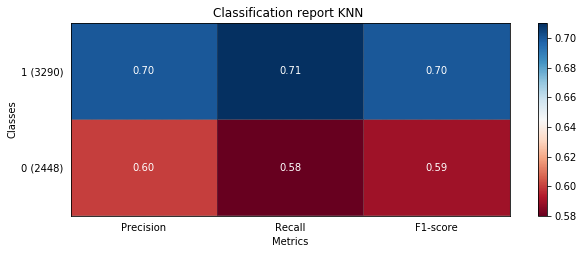

In [25]:
plot_classification_report(classification_report(y_test, knn.predict(X_test)), title='Classification report KNN ', cmap='RdBu')

** logistic Regression ** 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
logreg.score(X_test,y_test)

0.6868246775880098

In [29]:
print('\n*Classification LogReg:\n', classification_report(y_test, logreg.predict(X_test)))


*Classification LogReg:
              precision    recall  f1-score   support

          0       0.65      0.57      0.61      2448
          1       0.71      0.77      0.74      3290

avg / total       0.68      0.69      0.68      5738



D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\matplotlib\artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


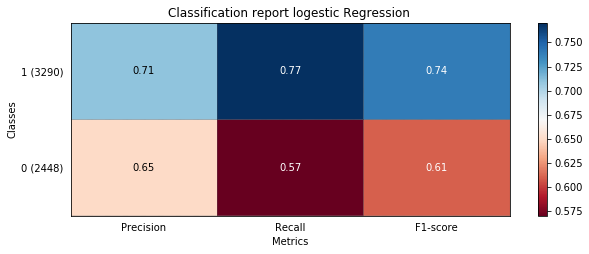

In [30]:
plot_classification_report(classification_report(y_test, logreg.predict(X_test)), title='Classification report logestic Regression ', cmap='RdBu')

** Random Forest Classifier **

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf_R = RandomForestClassifier(n_estimators=90)

In [29]:
clf_R.fit(X_train,y_train)
print(clf_R.score(X_train,y_train))
clf_R.score(X_test,y_test)

0.965335070198


0.66277448588358312

In [33]:
print('\n*Classification RandomForest down sample:\n', classification_report(y_test, clf_R.predict(X_test)))


*Classification RandomForest down sample:
              precision    recall  f1-score   support

          0       0.61      0.56      0.59      2448
          1       0.69      0.73      0.71      3290

avg / total       0.66      0.66      0.66      5738



D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\matplotlib\artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


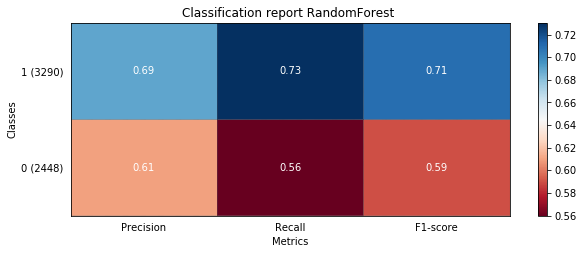

In [34]:
plot_classification_report(classification_report(y_test, clf_R.predict(X_test)), title='Classification report RandomForest ', cmap='RdBu')

In [34]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
fprU, tprU, thresholdsU = metrics.roc_curve(y_test, knn.predict_proba(X_test)[:,1])
fprD, tprD, thresholdsD = metrics.roc_curve(y_test, clf_R.predict_proba(X_test)[:,1])
fprl, tprl, thresholdsl = metrics.roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

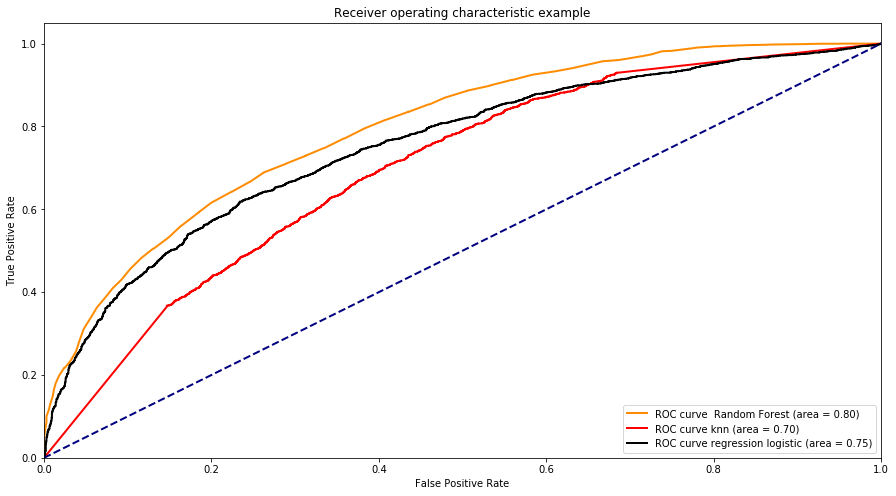

In [35]:
plt.figure(figsize=(15,8))
lw = 2
plt.plot(fprD, tprD, color='darkorange',
         lw=lw, label='ROC curve  Random Forest (area = %0.2f)' % auc(fprD, tprD))
plt.plot(fprU, tprU, color='red',
         lw=lw, label='ROC curve knn (area = %0.2f)' % auc(fprU, tprU))
plt.plot(fprl, tprl, color='black',
         lw=lw, label='ROC curve regression logistic (area = %0.2f)' % auc(fprl, tprl))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [33]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.optimizers import SGD,Adam,Nadam
from keras import callbacks
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(50, activation='relu', input_dim=np.array(X_train).shape[1])) # dimmension of each example
model.add(Dropout(0))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0))
model.add(Dense(1, activation='sigmoid'))

#nadam = Nadam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.001)
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
#for tensorboard viz
tbCallBack = callbacks.TensorBoard(log_dir='./SentimentAnalysis', histogram_freq=1, write_graph=True, write_images=True,embeddings_metadata='model.bin')

history = model.fit(np.array(X_train),y_train,epochs=100,callbacks=[tbCallBack],batch_size=128)
score = model.evaluate(np.array(X_val),y_val)
#back propagation
score1 = model.evaluate(np.array(X_train),y_train)
print("train accuracy : ",score1)
print("dev accuracy :  ",score)


Using TensorFlow backend.


Epoch 1/100
27636/27636 [==============================] - 1s - loss: 0.2166 - binary_accuracy: 0.6486      
Epoch 2/100
27636/27636 [==============================] - 0s - loss: 0.2047 - binary_accuracy: 0.6775     
Epoch 3/100
27636/27636 [==============================] - 0s - loss: 0.2008 - binary_accuracy: 0.6843     
Epoch 4/100
27636/27636 [==============================] - 0s - loss: 0.1983 - binary_accuracy: 0.6914     
Epoch 5/100
27636/27636 [==============================] - 0s - loss: 0.1966 - binary_accuracy: 0.6924     
Epoch 6/100
27636/27636 [==============================] - 0s - loss: 0.1955 - binary_accuracy: 0.6966     
Epoch 7/100
27636/27636 [==============================] - 0s - loss: 0.1942 - binary_accuracy: 0.6970     
Epoch 8/100
27636/27636 [==============================] - 0s - loss: 0.1931 - binary_accuracy: 0.6990     
Epoch 9/100
27636/27636 [==============================] - 0s - loss: 0.1902 - binary_accuracy: 0.7059     
Epoch 10/100
27636/27636 [=

In [43]:
print('\n*Classification KNN:\n', classification_report(y_test, model.predict_classes(np.array(X_test))))

4736/5738 [=======================>......] - ETA: 0s
*Classification KNN:
              precision    recall  f1-score   support

          0       0.61      0.69      0.65      2448
          1       0.74      0.67      0.70      3290

avg / total       0.69      0.68      0.68      5738



4928/5738 [========================>.....] - ETA: 0s

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\matplotlib\artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


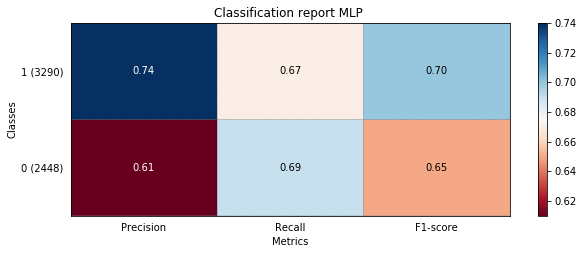

In [45]:
plot_classification_report(classification_report(y_test, model.predict_classes(np.array(X_test))), title='Classification report MLP ', cmap='RdBu')

In [36]:
fprM, tprM, thresholdsM = metrics.roc_curve(y_test, model.predict_classes(np.array(X_test)))

4800/5738 [========================>.....] - ETA: 0s

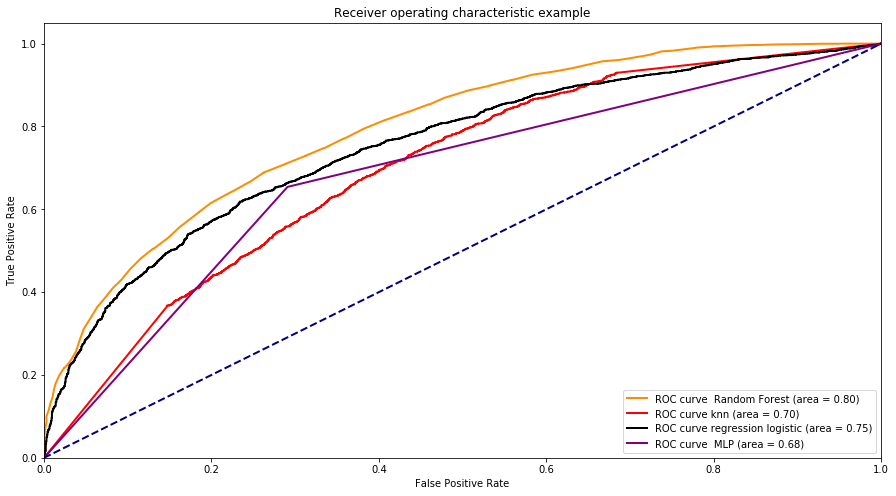

In [37]:
plt.figure(figsize=(15,8))
lw = 2
plt.plot(fprD, tprD, color='darkorange',
         lw=lw, label='ROC curve  Random Forest (area = %0.2f)' % auc(fprD, tprD))
plt.plot(fprU, tprU, color='red',
         lw=lw, label='ROC curve knn (area = %0.2f)' % auc(fprU, tprU))
plt.plot(fprl, tprl, color='black',
         lw=lw, label='ROC curve regression logistic (area = %0.2f)' % auc(fprl, tprl))
plt.plot(fprM, tprM, color='purple',
         lw=lw, label='ROC curve  MLP (area = %0.2f)' % auc(fprM, tprM))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Save Random forest model

In [8]:
with open('RandomForestAvgModel.pickle', 'wb') as f:
    pickle.dump(clf_R, f)

NameError: name 'clf_R' is not defined

### Load Random Forest model

In [19]:
with open('RandomForestAvgModel.pickle', 'rb') as f:
     clf_R = pickle.load(f)

EOFError: Ran out of input

In [41]:
clf_R.score(X_test,y_test)

0.7202858138724294

### For our first approche with average word embeddings 
-  Best Model So far is the random forest with AUCROC ** 0.79 ** on positif reviews
-  RAndom forest  with ** 0.72 **  accuracy
For next with will try the ** LSTM ** neural network for sequence models that take in a sequence of words and remebers the order of the words we will try ** LSTM **,**GRU** for it's gates to handle the vanishing gradient problem with deep ** RNN ** ,next we will combine ** CNN + LSTM ** ,**LSTM + CNN** and see wihch one gives the better results

### Prepare our input this time :
-  the Training shape will be (M,100,n) where M is number of **exemple** ,100 each word dimension and n is the number of words in each sentence

In [11]:
def get_Max_Min_length_Sent():
    Max = 0
    Min = 10
    CountSup50 = 0
    CountSup100 = 0
    CountSup200 = 0
    CountSup300 = 0
    CountSup400 = 0
    for S,t in Documents:
        if len(S) > Max:
            Max = len(S)
        if len(S) < Min :
            Min = len(S)
        if len(S) > 50:
            CountSup50 +=1
        if len(S) > 100:
            CountSup100 +=1
        if len(S) >200 :
            CountSup200 +=1
        if len(S) > 300:
            CountSup300 +=1
        if len(S) >400 :
            CountSup400 +=1
            
    return Max,Min,CountSup50,CountSup100,CountSup200,CountSup300,CountSup400

Max,Min,CountSup50,CountSup100,CountSup200,CountSup300,CountSup400 = get_Max_Min_length_Sent()
print("Max length sentence is :",Max,"Min length sentence is :",Min)
print("Sentence with more than 50 word ",CountSup50)
print("Sentence with more than 100 word ",CountSup100)
print("Sentence with more than 200 word ",CountSup200)
print("Sentence with more than 300 word ",CountSup300)
print("Sentence with more than 400 word ",CountSup400)


        

Max length sentence is : 506 Min length sentence is : 2
Sentence with more than 50 word  8366
Sentence with more than 100 word  1373
Sentence with more than 200 word  92
Sentence with more than 300 word  18
Sentence with more than 400 word  6


### fix_sentence_length is a function to fix the size of sentences to a fixed size to feed them into the neural net with specific length sentences with length less than that will be extended with zeros this process don't affect the alogrithme and sentences with length more that the specified length will be truncated

In [12]:
def fix_sentence_length(length,exemple):
    if len(exemple) > length:
        exemple = exemple[:length]
    elif len(exemple) < length:
        for i in range(length - len(exemple)):
            listzeros = [0] * 100
            exemple.append(listzeros)
    return exemple
ex = [2,5,4,8,7]
ex = fix_sentence_length(7,ex)
print(ex)    

[2, 5, 4, 8, 7, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [13]:
def Sent_Embeding_sequence(words,Documents):
    X_SentsEmb = []
    y_SentsEmb = []
    #on Va récuperer l'embeding de chaque sentence avec l'average des vecteur qui le compose
    for S,t in Documents: #S est la phrase , t est la class
        #Average of embeding of all words in sentence
        Sent = []
        Sent = [list(model[m]) for m in S]
#        if len(Sent) < 100:
#            for i in range(100 - len(Sent)):
#                Sent.append(0) # pour avoir une longeur standart de 100 mots par Sent
#        else :
#            Sent = Sent[:100]
        #Add Sentence Vector to list
        Sent = fix_sentence_length(100,Sent)
        X_SentsEmb.append(Sent)
        #Add label to y_SentEmb
        if t == 'neg':
            y_SentsEmb.append(0)
        elif t == 'pos':
            y_SentsEmb.append(1)
        else:
            print('No match label !!! ',t)
    return X_SentsEmb,y_SentsEmb

In [12]:
words = list(model.wv.vocab)
X,Y = Sent_Embeding_sequence(words,Documents)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


NameError: name 'fix_sentence_length' is not defined

In [18]:
print(len(X[1]))
print(len(Documents[1][0]))
print(X[:1])

100
16
[[[0.57772708, -2.6966903, 1.3096311, 1.7993178, -0.45872158, -0.44108117, -1.3963939, 1.4934766, 1.6493213, 0.44445017, -1.2355235, 0.33959857, -0.34104031, -2.3669698, 2.1460216, 0.45897022, 0.62695801, 3.946667, 1.397765, -2.0303574, 1.5760499, -0.72018641, -0.037402246, 0.54166126, -0.62807137, -1.6776373, -1.8471816, 0.21798298, -0.66202945, -0.53047299, 1.2584944, 1.056882, 0.78776073, 0.12464927, -0.64093775, 1.2785107, -0.29681087, 0.76776183, -0.87678987, -1.5992565, 0.10518414, 0.88694847, -0.48308522, -0.094921567, -0.24480118, -0.70208395, 1.2938561, 1.6348791, -0.24320202, -1.0535762, 0.60283428, -0.29820505, -1.03376, 2.2614436, 0.24393557, 1.0993811, 0.83535999, -0.71629745, 0.73035371, -0.27199832, -1.4130625, -3.0202918, -2.0102763, 1.0955864, 0.26779354, 0.60060024, -3.1038978, 3.7645278, 1.6210555, 0.49657267, 0.040597435, -1.1487242, 0.59847349, 0.85542178, -2.083113, -0.14881144, 0.5724619, -0.28277364, -1.5713739, 0.49018058, 0.24886343, -0.59172142, -0.695

In [19]:
X_a = np.array(X)
#lista = np.reshape(lista, (len(lista),2, 3))
print("X_train Shape",X_a.shape)


X_train Shape (38252, 100, 100)


### Save Numpy Array for X_train and y_train

In [28]:
np.save('D://content/datalab/X_train.npy',X_a)

In [29]:
np.save('D://content/datalab/y_train.npy',Y)

### load Numpy Array for X_train and y_train

In [14]:
X = np.load('D://content/datalab/X_train.npy')

In [15]:
Y = np.load('D://content/datalab/y_train.npy')

In [16]:
Y

array([1, 0, 1, ..., 1, 0, 1])

In [18]:
from sklearn.model_selection import train_test_split
#train test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
#train dev
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)
del X
del Y

In [19]:
del X_train
del y_train

### For next we will continue on google colabratory for better performence on GPU we will use X and Y
- In this file you will find the LSTM neural networks architecture :
https://github.com/alaBay94/Sentiment-analysis-amazon-Products-Reviews/blob/master/SentimentAnalysisClassificationWithLSTM_GoogleColab.ipynb
- Load LSTM model with on layer We will compare 5 RNN models:
- LSTM_Model with mini batch
- LSTMBatch_Model with batch learning
- LSTM3L_Model with 3 stacked layers
- BILSTM_Model with Biderctional LSTM
- CNNLSTM_Model with one convultional layer and LSTM layer
- ** We also load our test set that these models nerver saw before **

In [23]:
from keras.models import load_model
modelMini = load_model('LSTM_Model.h5')
model3L = load_model('LSTM3L_Model.h5')
modelBatch = load_model('LSTMBatch_Model.h5')
modelBI = load_model('BILSTM_Model.h5')
modelCNNLSTM = load_model('CNNLSTM_Model.h5')

Using TensorFlow backend.


Model LSTM mini Batch Classification report
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 80,501
Trainable params: 80,501
Non-trainable params: 0
_________________________________________________________________
None

*Classification LSTM mini Batch:
              precision    recall  f1-score   support

          0       0.75      0.77      0.76      2448
          1       0.83      0.81      0.82      3290

avg / total       0.79      0.79      0.79      5738



D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\matplotlib\artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


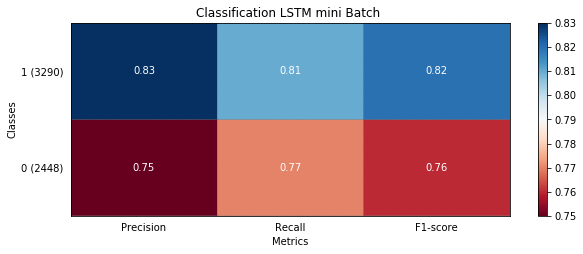

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
print("Model LSTM mini Batch Classification report")
MiniPrediction = modelMini.predict_classes(X_test)
print(modelMini.summary())
print('\n*Classification LSTM mini Batch:\n', classification_report(y_test, MiniPrediction))
plot_classification_report(classification_report(y_test, MiniPrediction), title='Classification LSTM mini Batch ', cmap='RdBu')

Model LSTM Batch Classification report
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 80,501
Trainable params: 80,501
Non-trainable params: 0
_________________________________________________________________
None

*Classification LSTM Batch:
              precision    recall  f1-score   support

          0       0.75      0.77      0.76      2448
          1       0.83      0.81      0.82      3290

avg / total       0.79      0.79      0.79      5738



D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\matplotlib\artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


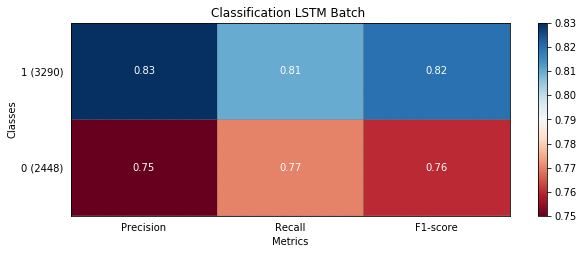

In [26]:
print("Model LSTM Batch Classification report")
BatchPrediction = modelMini.predict_classes(X_test)
print(modelMini.summary())
print('\n*Classification LSTM Batch:\n', classification_report(y_test, BatchPrediction))
plot_classification_report(classification_report(y_test, BatchPrediction), title='Classification LSTM Batch ', cmap='RdBu')

Model 3 layer LSTM Classification report
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 32)           17024     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 105,777
Trainable params: 105,777
Non-trainable params: 0
_________________________________________________________________
None

*Classification 3 layer LSTM:
              precision    recall  f1-score   support

          0       0.73      0.72      0.73      2448
          1       0.79      0.80      0.80      3290

avg / total       0.77      0

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\matplotlib\artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


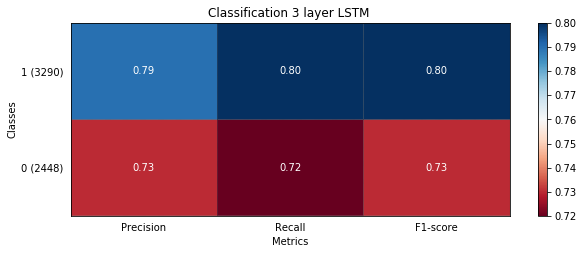

In [25]:
print("Model 3 layer LSTM Classification report")
model3LPrediction = model3L.predict_classes(X_test)
print(model3L.summary())
print('\n*Classification 3 layer LSTM:\n', classification_report(y_test, model3LPrediction))
plot_classification_report(classification_report(y_test, model3LPrediction), title='Classification 3 layer LSTM ', cmap='RdBu')

Model CNN-LSTM Classification report
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 100, 100)          30100     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 50, 100)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 110,601
Trainable params: 110,601
Non-trainable params: 0
_________________________________________________________________
None

*Classification CNN-LSTM:
              precision    recall  f1-score   support

          0       0.76      0.72      0.74      2448
          1       0.80      0.83      0.81      3290

avg / total       0.78      0.78     

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\matplotlib\artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


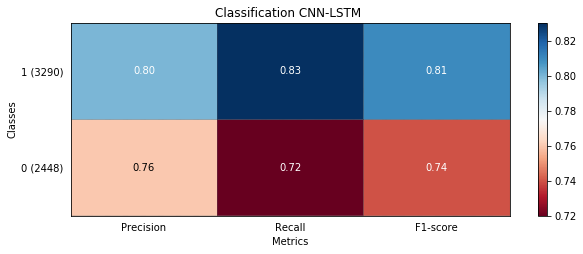

In [27]:
print("Model CNN-LSTM Classification report")
CNNLSTMPrediction = modelCNNLSTM.predict_classes(X_test)
print(modelCNNLSTM.summary())
print('\n*Classification CNN-LSTM:\n', classification_report(y_test, CNNLSTMPrediction))
plot_classification_report(classification_report(y_test, CNNLSTMPrediction), title='Classification CNN-LSTM ', cmap='RdBu')

Model BILSTM Classification report
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 128)               84480     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 84,609
Trainable params: 84,609
Non-trainable params: 0
_________________________________________________________________
None

*Classification BILSTM:
              precision    recall  f1-score   support

          0       0.73      0.72      0.73      2448
          1       0.79      0.81      0.80      3290

avg / total       0.77      0.77      0.77      5738



D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\matplotlib\artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


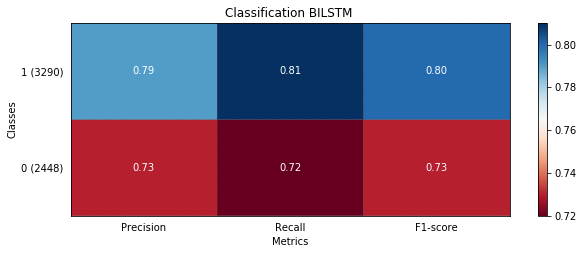

In [28]:
print("Model BILSTM Classification report")
BILSTMPrediction = modelBI.predict_classes(X_test)
print(modelBI.summary())
print('\n*Classification BILSTM:\n', classification_report(y_test, BILSTMPrediction))
plot_classification_report(classification_report(y_test, BILSTMPrediction), title='Classification BILSTM ', cmap='RdBu')

####  We can't tell what is the best model from these result because they are too close to each other ,but what we can tell is that the model succeded to predict the positive reviews more than the negatif ones

In [29]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
fprB, tprB, thresholdsB = metrics.roc_curve(y_test, modelBatch.predict_proba(X_test))
fprM, tprM, thresholdsM = metrics.roc_curve(y_test, modelMini.predict_proba(X_test))
fpr3l, tpr3l, thresholds3l = metrics.roc_curve(y_test, model3L.predict_proba(X_test))
fprBI, tprBI, thresholdsBI = metrics.roc_curve(y_test, modelBI.predict_proba(X_test))
fprCNN, tprCNN, thresholdsCNN = metrics.roc_curve(y_test, modelCNNLSTM.predict_proba(X_test))

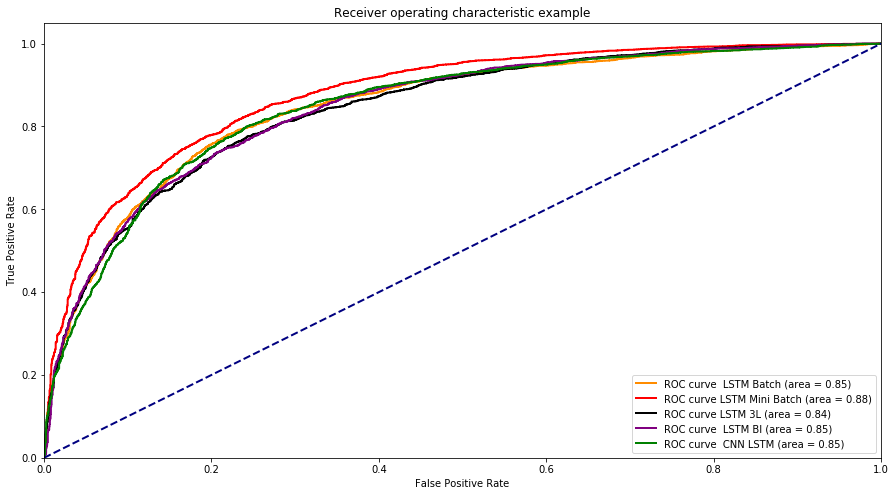

In [31]:
plt.figure(figsize=(15,8))
lw = 2
plt.plot(fprB, tprB, color='darkorange',
         lw=lw, label='ROC curve  LSTM Batch (area = %0.2f)' % auc(fprB, tprB))
plt.plot(fprM, tprM, color='red',
         lw=lw, label='ROC curve LSTM Mini Batch (area = %0.2f)' % auc(fprM, tprM))
plt.plot(fpr3l, tpr3l, color='black',
         lw=lw, label='ROC curve LSTM 3L (area = %0.2f)' % auc(fpr3l, tpr3l))
plt.plot(fprBI, tprBI, color='purple',
         lw=lw, label='ROC curve  LSTM BI (area = %0.2f)' % auc(fprBI, tprBI))
plt.plot(fprCNN, tprCNN, color='green',
         lw=lw, label='ROC curve  CNN LSTM (area = %0.2f)' % auc(fprCNN, tprCNN))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Best One LSTM Mini Batch with 0.88 auc